In [31]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [8]:
# Load dataset
df = pd.read_csv(r"C:\Users\gottam dhanush\OneDrive\Documents\loan\loan_approval_dataset.csv")  # Replace with your file name

# Rename columns for clarity
df.columns = [
    "loan_id", "dependents", "education", "self_employed", "income_annum",
    "loan_amount", "loan_term", "cibil_score", "residential_assets_value",
    "commercial_assets_value", "luxury_assets_value", "bank_asset_value", "loan_status"
]

# Drop 'loan_id' as it's not useful for prediction
df.drop("loan_id", axis=1, inplace=True)

# Display first few rows
df.head()


,dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [9]:
#Data Preprocessing
label_cols = ['education', 'self_employed', 'loan_status']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [10]:
df = df.dropna()
#handling missing values if any present


In [11]:
scaler = StandardScaler()

numeric_cols = [
    'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value'
]

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])



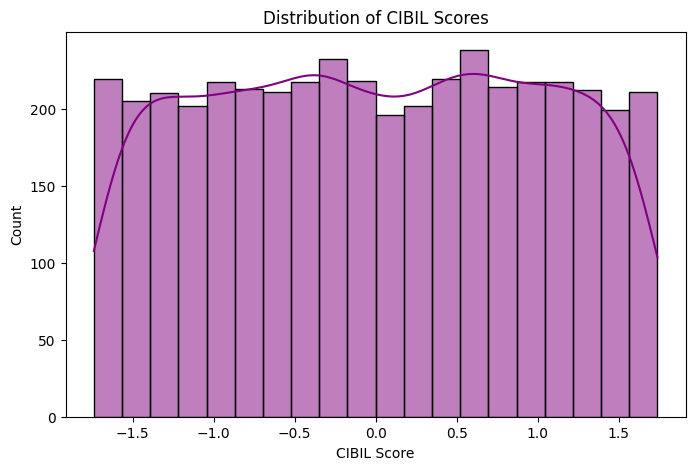

In [15]:
#Distribution of CIBIL Scores
plt.figure(figsize=(8, 5))
sns.histplot(df['cibil_score'], kde=True, bins=20, color='purple')
plt.title("Distribution of CIBIL Scores")
plt.xlabel("CIBIL Score")
plt.ylabel("Count")
plt.show()

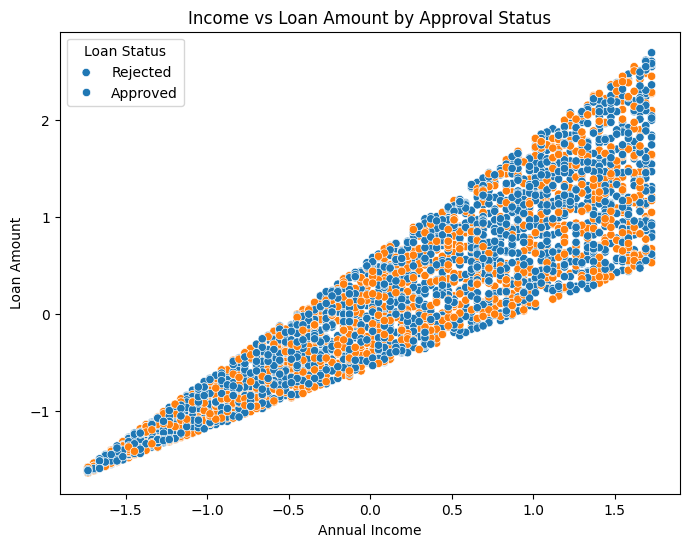

In [16]:
#Loan Amount vs Income (Colored by Loan Status)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income_annum', y='loan_amount', hue='loan_status', data=df)
plt.title("Income vs Loan Amount by Approval Status")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.legend(title="Loan Status", labels=["Rejected", "Approved"])
plt.show()

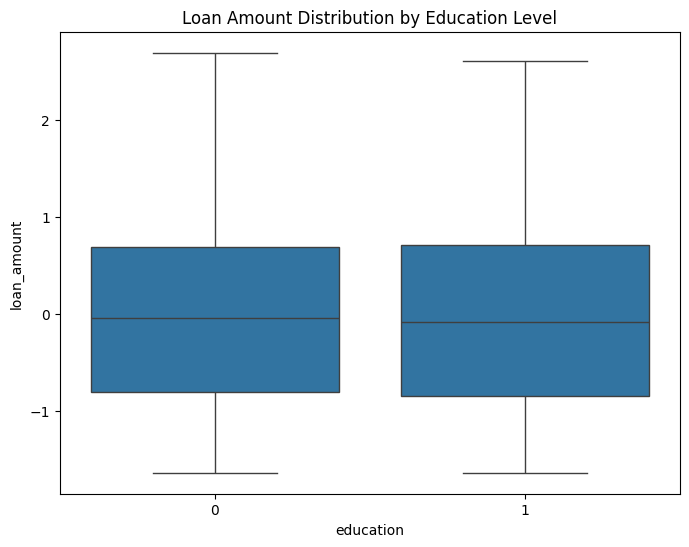

In [17]:
#Boxplot: Loan Amount by Education
plt.figure(figsize=(8, 6))
sns.boxplot(x='education', y='loan_amount', data=df)
plt.title("Loan Amount Distribution by Education Level")
plt.show()

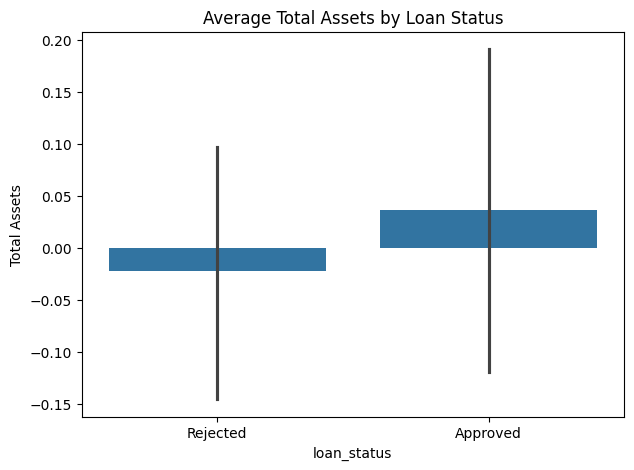

In [18]:
#Barplot: Average Assets by Loan Status
df['total_assets'] = (
    df['residential_assets_value'] + df['commercial_assets_value'] +
    df['luxury_assets_value'] + df['bank_asset_value']
)

plt.figure(figsize=(7, 5))
sns.barplot(x='loan_status', y='total_assets', data=df)
plt.title("Average Total Assets by Loan Status")
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.ylabel("Total Assets")
plt.show()

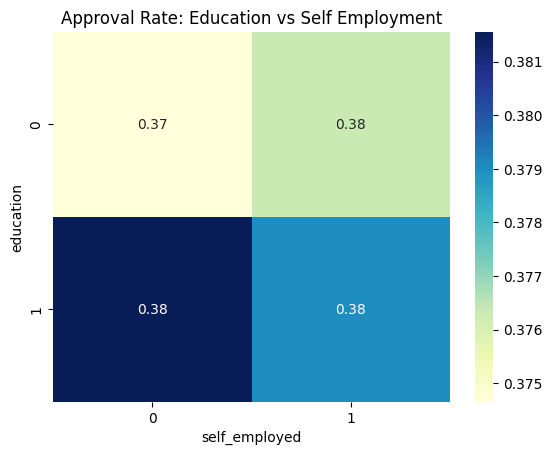

In [23]:
#Heatmap: Approval Rate by Education and Employment
pivot_table = pd.crosstab(df['education'], df['self_employed'], values=df['loan_status'], aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Approval Rate: Education vs Self Employment")
plt.show()


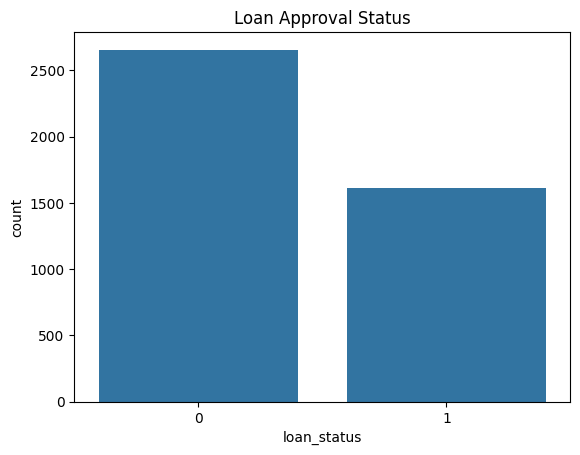

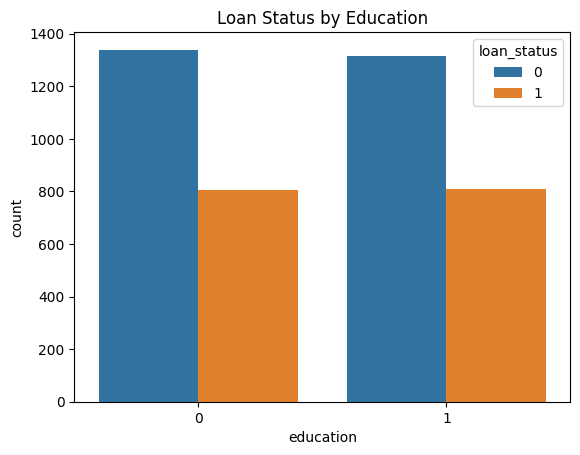

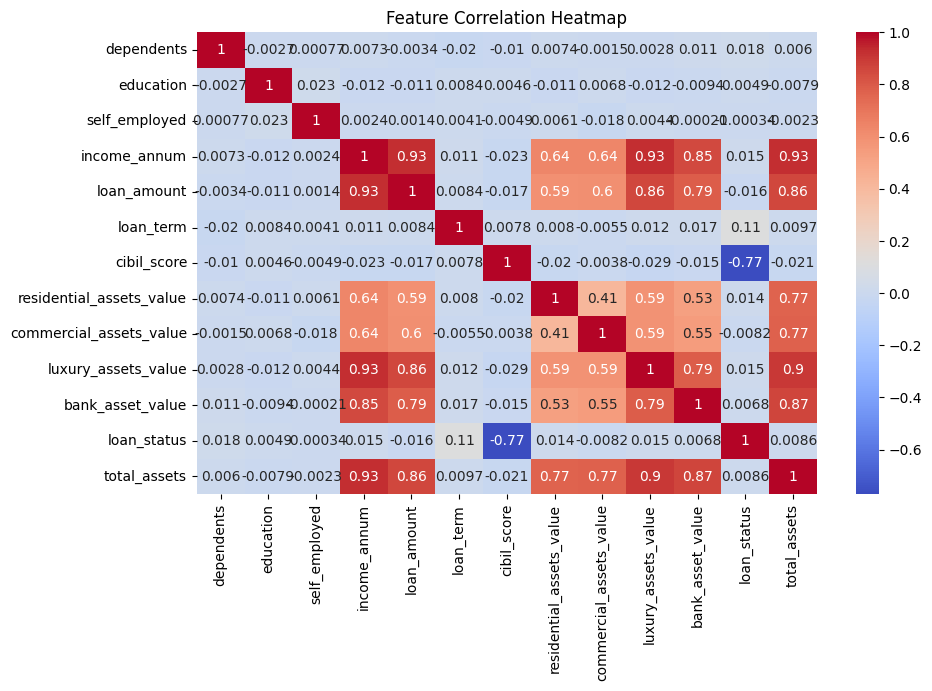

In [22]:
#Exploratory Data Analysis (EDA)
# Loan approval counts
sns.countplot(x='loan_status', data=df)
plt.title("Loan Approval Status")
plt.show()

# Education vs Loan Status
sns.countplot(x='education', hue='loan_status', data=df)
plt.title("Loan Status by Education")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:

#ML 
# Define features and target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.977751756440281
Confusion Matrix:
 [[532   4]
 [ 15 303]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       536
           1       0.99      0.95      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



In [14]:
#------------------------------------------------------------------------------------------
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy Score     : {accuracy:.2f}")
print(f"Precision Score    : {precision:.2f}")
print(f"Recall Score       : {recall:.2f}")
print(f"F1 Score           : {f1:.2f}")
print(f"ROC-AUC Score      : {roc_auc:.2f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Model Evaluation Metrics:
Accuracy Score     : 0.98
Precision Score    : 0.99
Recall Score       : 0.95
F1 Score           : 0.97
ROC-AUC Score      : 0.97

Confusion Matrix:
[[532   4]
 [ 15 303]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       536
           1       0.99      0.95      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



In [30]:
# Add predictions to dataframe
df["prediction"] = model.predict(X)

df.to_csv("loan_predictions_final2.csv", index=False)


'C:\\Users\\gottam dhanush'